In [1]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits

from DFDetect import DWFS_mrf, detect

Setting rcParams['ps.usedistiller'] requires ghostscript.


# Get table list from /home/tbm33/anaconda2/envs/py3/lib/python3.7/site-packages/unagi/data/pdr2_wide/pdr2_wide_tables.fits


In [2]:
tile_name = 'tile_223.647_1.376'# 'tile_223.647_-1.424' 

#load Decals fits file
decals_fits = fits.open(DWFS_mrf.decals_dir + tile_name + '_decals_cutout_g.fits')

res = DWFS_mrf.run_mrf_tile(tile_name, './output/', 'g', yaml_file = '../df_decals_g.yaml', copy_to_final = False)

using master MAST catalog
2021-03-16 11:51:18,269 Running Multi-Resolution Filtering (MRF) on "decals" and "df" images!
2021-03-16 11:51:18,277 Subtract BACKVAL=706.1 of Dragonfly image
2021-03-16 11:51:18,286 Magnify Dragonfly image with a factor of 3.0:
2021-03-16 11:51:20,380 Register high resolution image "/netb/dokkum/data/DWFS/decals_frames/tile_223.647_1.376_decals_cutout_g.fits" with "/netb/dokkum/data/DWFS/tile_frames/tile_223.647_1.376_g.fits"
2021-03-16 11:51:32,153 Register high resolution image "/netb/dokkum/data/DWFS/decals_frames/tile_223.647_1.376_decals_cutout_r.fits" with "/netb/dokkum/data/DWFS/tile_frames/tile_223.647_1.376_g.fits"
2021-03-16 11:51:43,910 Build flux models on high-resolution images: Blue band
2021-03-16 11:51:43,911     - sigma = 2.0, minarea = 5
2021-03-16 11:51:43,912     - deblend_cont = 0.00500, deblend_nthres = 32.0
2021-03-16 11:51:46,029     - Detect 8991 objects
2021-03-16 11:51:50,715 Build flux models on high-resolution images: Red band
20

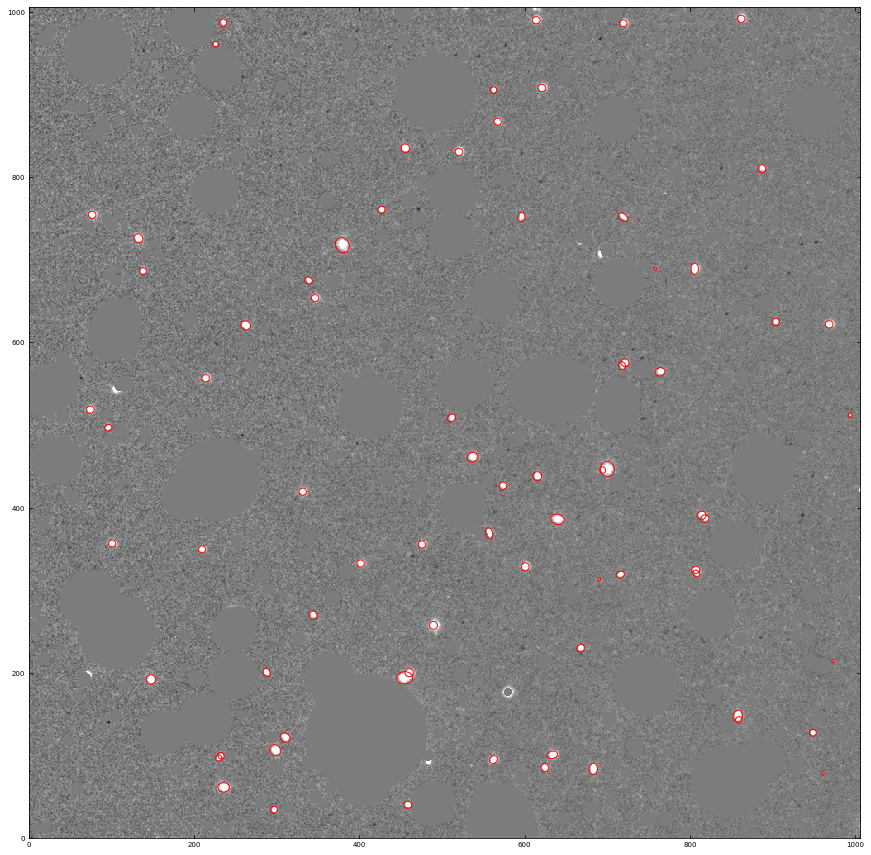

In [3]:
obj_cur = detect.detect_sources(res.lowres_final.image, 10, 'g',  res.lowres_final.wcs, mask = res.lowres_mask.image)
plt.show()

In [4]:
#There are 75 detected sources
obj_cur

,thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2,...,mask_phot,ra,dec,star_near,gal_near,star_mag,gal_z,gal_log_ms,gal_photoobjid,gal_specobjid
0,35.468975,40,21,294,300,31,37,296.540260,33.946408,1.913070,...,0.0,223.790199,1.050260,False,True,-99.00000,0.201536,11.254346,1237648705668514051,605756723910699008
1,30.918476,56,34,454,462,36,44,458.546321,40.003358,2.485269,...,0.0,223.677781,1.054527,False,False,-99.00000,-99.000000,-99.000000,-99,-99
2,37.018486,136,64,228,243,56,66,235.549640,61.125809,5.538069,...,0.0,223.832529,1.069101,False,True,-99.00000,0.087577,11.191960,1237651735239262575,348048240203032576
3,24.206852,5,0,961,962,77,79,961.384874,78.182076,0.236746,...,0.0,223.328781,1.081201,True,False,21.65097,-99.000000,-99.000000,-99,-99
4,27.725925,77,42,620,629,80,89,624.340534,84.799475,2.468984,...,0.0,223.562734,1.085684,False,True,-99.00000,0.033144,8.852879,1237651735239131366,348029548505360384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,40.125927,22,10,224,228,959,963,225.794562,960.916527,1.293809,...,0.0,223.839647,1.693595,True,False,19.05539,-99.000000,-99.000000,-99,-99
71,40.624233,42,20,232,238,984,990,234.873005,986.971917,2.212964,...,0.0,223.833357,1.711683,False,True,-99.00000,-99.000000,-99.000000,1237651753492611340,-99
72,28.405777,96,57,715,725,981,991,719.476835,986.433066,2.256509,...,0.0,223.496988,1.711601,True,False,16.07673,-99.000000,-99.000000,-99,-99
73,30.706810,114,59,607,620,984,995,613.979454,990.080057,2.497775,...,0.0,223.570225,1.714074,True,False,16.04058,-99.000000,-99.000000,-99,-99


In [5]:
#Sources w/ no counterpart
obj_no_sdss = obj_cur.query('star_near == False and gal_near == False').reset_index()
obj_no_sdss

,index,thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,...,mask_phot,ra,dec,star_near,gal_near,star_mag,gal_z,gal_log_ms,gal_photoobjid,gal_specobjid
0,1,30.918476,56,34,454,462,36,44,458.546321,40.003358,...,0.0,223.677781,1.054527,False,False,-99.0,-99.0,-99.0,-99,-99
1,57,25.740959,134,84,800,812,682,695,805.909654,689.104292,...,0.0,223.436892,1.505257,False,False,-99.0,-99.0,-99.0,-99,-99


# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: g
2021-03-16 11:53:20,839 findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
2021-03-16 11:53:20,841 findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
2021-03-16 11:53:20,844 findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
2021-03-16 11:53:20,847 findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.


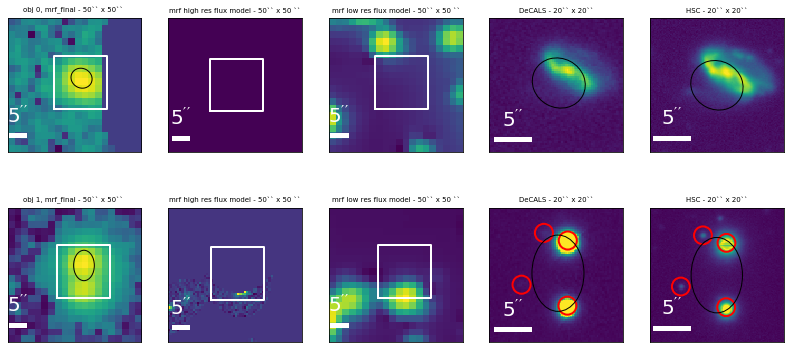

In [6]:
hr = detect.plot_cutouts(res,obj_no_sdss,decals_fits)
plt.show()

In [7]:
#Sources w/ gal counterpart at low z
obj_lowz = obj_cur.query('0 < gal_z < 0.05').reset_index()
obj_lowz

,index,thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,...,mask_phot,ra,dec,star_near,gal_near,star_mag,gal_z,gal_log_ms,gal_photoobjid,gal_specobjid
0,4,27.725925,77,42,620,629,80,89,624.340534,84.799475,...,0.0,223.562734,1.085684,False,True,-99.00000,0.033144,8.852879,1237651735239131366,348029548505360384
1,10,36.430225,116,52,293,304,101,112,297.974362,106.078977,...,0.0,223.789231,1.100328,True,True,22.33104,0.005698,8.170903,1237651735239262516,348046865813497856
2,50,37.097240,99,60,257,268,615,625,262.295698,620.539246,...,0.0,223.814185,1.457389,False,True,-99.00000,0.044529,9.603924,1237651735776133324,605786685602555904
3,58,33.570137,184,77,372,386,710,726,379.403689,717.908556,...,0.0,223.732950,1.525034,False,True,-99.00000,0.005868,8.241547,1237651735776133484,605784211701393408
4,61,27.054745,68,38,715,724,747,756,719.080486,751.573661,...,0.0,223.497188,1.548580,False,True,-99.00000,0.043914,9.241725,1237651753492480372,605795481695578112


# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: g


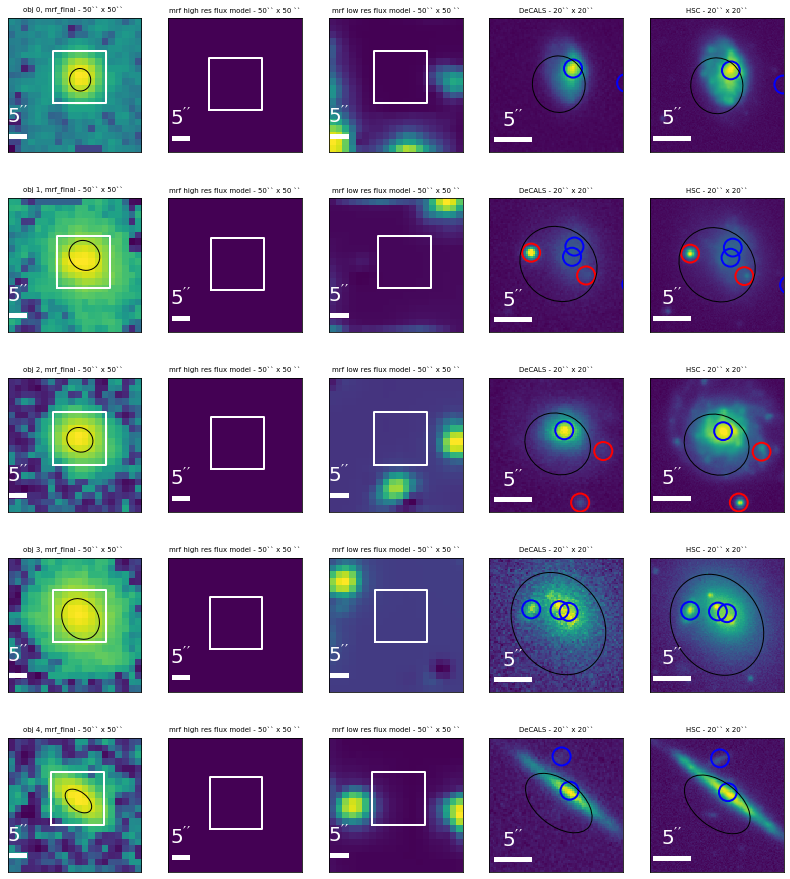

In [8]:
## Plot cutouts of low z sources, takes ~ 10-15 s per sources
fig = detect.plot_cutouts(res,obj_lowz,decals_fits)
plt.show()